Package
=====================

In [ ]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import numpy as np

Dataset
=================

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train_numpy, Y_train_numpy), (X_test_numpy, Y_test_numpy) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
label = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 
         5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

In [ ]:
X_test = torch.from_numpy(np.rollaxis(X_test_numpy, 3, 1)).type(torch.FloatTensor).div_(255)
X_train = torch.from_numpy(np.rollaxis(X_train_numpy, 3, 1)).type(torch.FloatTensor).div_(255)
Y_train = torch.from_numpy(Y_train_numpy).type(torch.long).view(50000)
Y_test = torch.from_numpy(Y_test_numpy).type(torch.long).view(10000)

In [ ]:
print(f"{Y_train.size()}, {Y_test.size()} \n \
{X_train.size()}, {X_test.size()}")

torch.Size([50000]), torch.Size([10000]) 
 torch.Size([50000, 3, 32, 32]), torch.Size([10000, 3, 32, 32])


Softmax Regression
===================

In [ ]:
class SR1(nn.Module):
    def __init__(self):
        super(SR1, self).__init__()
        self.model = nn.Sequential(OrderedDict([
            ('do1', nn.Dropout(0.5)),
            ('fc1', nn.Linear(3 * 32 * 32, 10)),
            ('bn1', nn.BatchNorm1d(10)),
            ('softmax1', nn.Softmax(dim=1))
        ]))
        # self.fc1   = nn.Linear(28 * 28, 1500)
        # self.fc2   = nn.Linear(1500, 10)
        self.ce = nn.CrossEntropyLoss()
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
        x = self.model(x)
        return x

    # x.size(0) = y.size(0)
    def loss(self, x, y):
        loss = self.ce(x, y)
        return loss


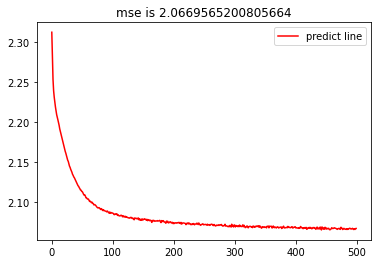

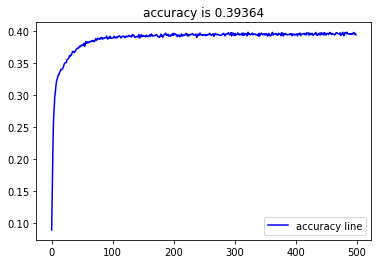

In [ ]:
sr1 = SR1()
epoch = 500
optimizer = optim.SGD(sr1.parameters(), lr=0.5, momentum=0.9) # momentum = decay weight
epoch_list = []
loss_list = []
accu_list = []

while(epoch > 0):
    optimizer.zero_grad()
    out = sr1(X_train)
    loss = sr1.loss(out, Y_train)
    loss.backward()
    optimizer.step()  # updates parameters

    pred = out.data.max(1, keepdim=False)[1]
    correct = pred.eq(Y_train.data.view_as(pred)).detach().sum()
    correct_rate = correct.detach().item() / X_train.size()[0]

    epoch_list.append((500-epoch))
    loss_list.append(loss.item())
    accu_list.append(correct_rate)

    epoch -= 1

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=loss_list, color='red', label='predict line', ax=ax)
plt.title(f"mse is {loss}")
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=accu_list, color='blue', label='accuracy line', ax=ax)
plt.title(f"accuracy is {correct_rate}")
plt.show()

In [ ]:
out = sr1(X_test)
loss = sr1.loss(out, Y_test)

pred = out.data.max(1, keepdim=False)[1]
correct = pred.eq(Y_test.data.view_as(pred)).detach().sum()
correct_rate = correct.detach().item() / X_test.size()[0]
correct_rate

0.4027